# EDA

## Libraries and data import

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#Lectura de archivos
df_steamgames=pd.read_csv('Datos_procesados/df_steamgames.csv')
df_users=pd.read_csv('Datos_procesados/df_users.csv')
df_user_reviews=pd.read_csv('Datos_procesados/df_user_reviews.csv')

## Steamgames

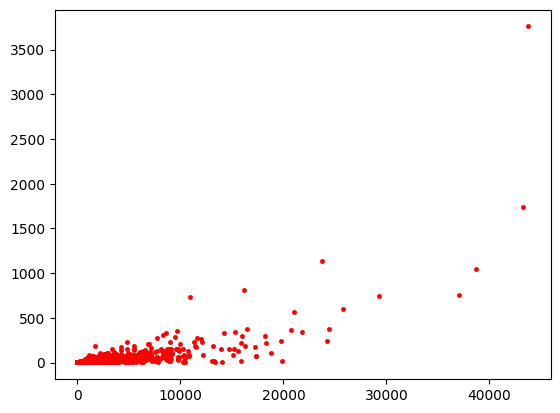

In [4]:
#relacion entre reviews y cantidad de jugadores

plt.scatter( df_steamgames['players'], df_steamgames['total_reviews'], color='red', marker='.', linewidth=0.5)

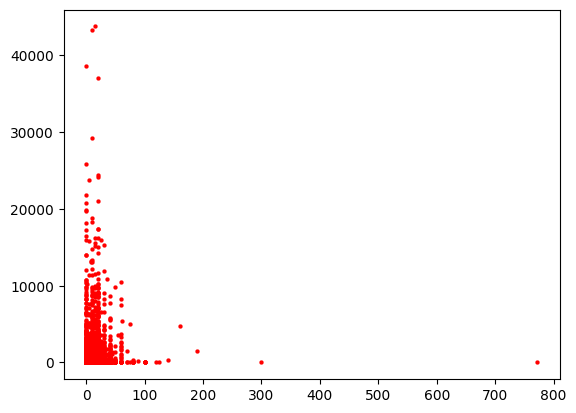

In [5]:
#relacion entre precio y cantidad de jugadores

plt.scatter(df_steamgames['price'], df_steamgames['players'], color='red', marker='.', linewidth=0.1)

In [21]:
genres=df_steamgames.columns.tolist()
columnasasacar=['item_id', 'item_title',
 'price', 'playtime_forever',
 'mean_recommend',
 'mean_sentiment_analysis',
 'total_reviews',
 'players', 'release_year']

for i in columnasasacar:
    genres.remove(i)

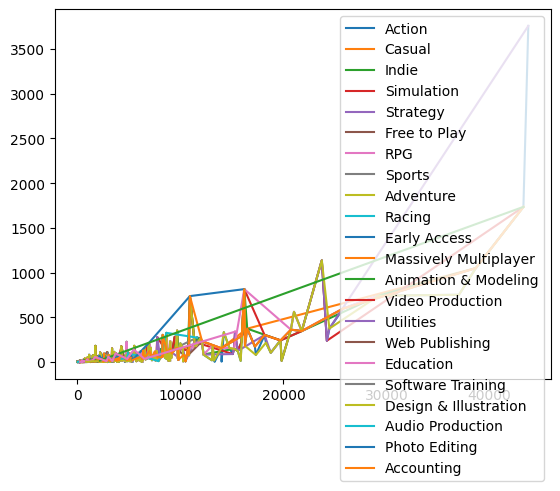

In [31]:
for i in genres:
    df_genero=df_steamgames[df_steamgames[i]==1].sort_values('players').reset_index()
    plt.plot(df_genero['players'], df_genero['total_reviews'], label=i)
plt.legend()
plt.show()

In [37]:
#se genera un dataframe para el analisis estadístico por género
df_genres_statistics=pd.DataFrame(genres)
df_genres_statistics.rename(columns={0:'genre'}, inplace=True)

In [45]:
df_genres_statistics['games']=pd.Series()
df_genres_statistics['playtime_forever']=pd.Series()
df_genres_statistics['mean_recommend']=pd.Series()
df_genres_statistics['mean_sentiment_analysis']=pd.Series()
df_genres_statistics['total_reviews']=pd.Series()

In [48]:
df_steamgames[df_steamgames['Action']==1]['item_id'].count()

13017

In [49]:
for index, row in df_genres_statistics.iterrows():
    i=row['genre']
    df_genres_statistics.at[index,'games']=df_steamgames[df_steamgames[i]==1]['item_id'].count()
    df_genres_statistics.at[index,'playtime_forever']=df_steamgames[df_steamgames[i]==1]['playtime_forever'].sum()
    df_genres_statistics.at[index,'mean_recommend']=df_steamgames[df_steamgames[i]==1]['mean_recommend'].mean()
    df_genres_statistics.at[index,'mean_sentiment_analysis']=df_steamgames[df_steamgames[i]==1]['mean_sentiment_analysis'].mean()
    df_genres_statistics.at[index,'total_reviews']=df_steamgames[df_steamgames[i]==1]['total_reviews'].sum()
    df_genres_statistics.at[index,'players']=df_steamgames[df_steamgames[i]==1]['players'].sum()
    


<BarContainer object of 22 artists>

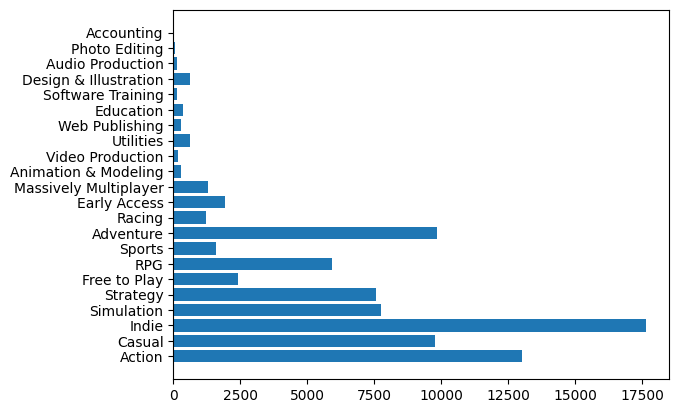

In [53]:
#Juegos por género
plt.barh(df_genres_statistics['genre'], df_genres_statistics['games'])

In [54]:
df_genres_statistics.columns

Index(['genre', 'games', 'playtime_forever', 'mean_recommend',
       'mean_sentiment_analysis', 'total_reviews', 'players'],
      dtype='object')

<BarContainer object of 22 artists>

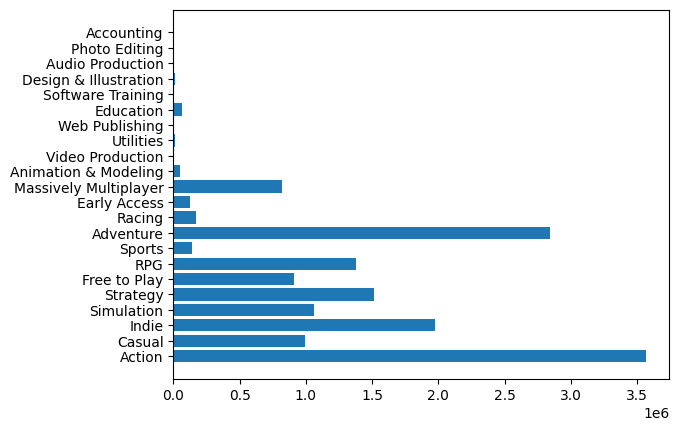

In [55]:
#Jugadores por género
plt.barh(df_genres_statistics['genre'], df_genres_statistics['players'])

<BarContainer object of 22 artists>

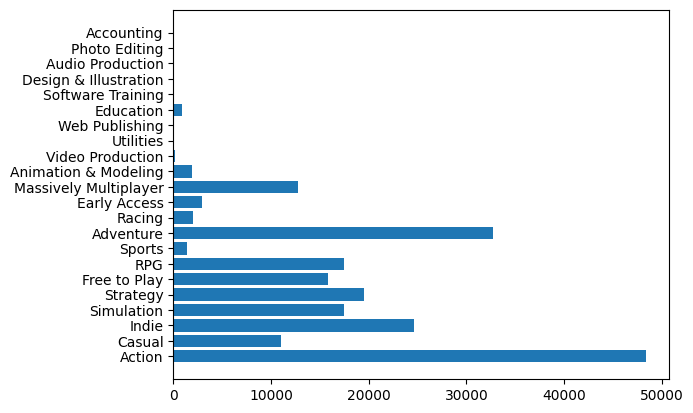

In [57]:
#reviews por género
plt.barh(df_genres_statistics['genre'], df_genres_statistics['total_reviews'])

(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00,
        3.000e+00, 4.000e+00, 4.000e+00, 3.000e+00, 1.000e+00, 9.000e+00,
        7.000e+00, 1.000e+01, 1.200e+01, 1.600e+01, 1.500e+01, 3.400e+01,
        3.600e+01, 3.300e+01, 3.900e+01, 4.200e+01, 6.100e+01, 5.500e+01,
        4.000e+01, 6.900e+01, 5.000e+01, 8.400e+01, 7.900e+01, 1.020e+02,
        1.550e+02, 1.670e+02, 2.130e+02, 3.370e+02, 4.360e+02, 5.890e+02,
        1.192e+03, 1.551e+03, 2.832e+03, 4.945e+03, 6.933e+03, 9.517e+03,
        9.600e+01, 3.000e+00, 1.000e+00]),
 array([1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978.,
        1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
        1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
        1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
        2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
        20

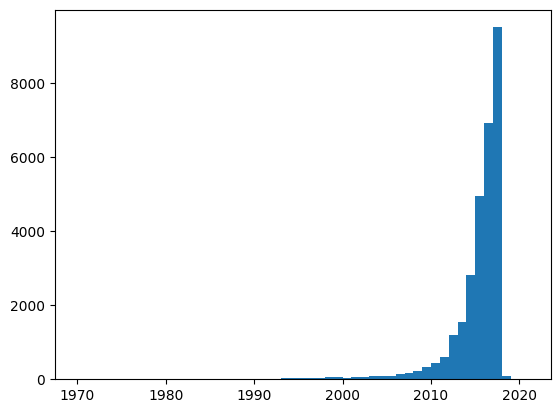

In [6]:
#juegos por año de lanzamiento
bines=max(df_steamgames['release_year'][df_steamgames['release_year']!=0].unique()) - min(df_steamgames['release_year'][df_steamgames['release_year']!=0].unique())
plt.hist(df_steamgames['release_year'][df_steamgames['release_year']!=0], bins=bines)

## Users

(array([6.3244e+04, 5.6400e+03, 1.2210e+03, 3.8000e+02, 1.6400e+02,
        9.2000e+01, 4.3000e+01, 2.4000e+01, 2.5000e+01, 1.2000e+01,
        1.4000e+01, 9.0000e+00, 6.0000e+00, 6.0000e+00, 3.0000e+00,
        2.0000e+00, 4.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 1.56240e+02, 3.11480e+02, 4.66720e+02, 6.21960e+02,
        7.77200e+02, 9.32440e+02, 1.08768e+03, 1.24292e+03, 1.39816e+03,
        1.55340e+03, 1.70864e+03, 1.86388e+03, 2.01912e+03, 2.17436e+03,
        2.32960e+03, 2.48484e+03, 2.64008e+03, 2.79532e+03, 2.95056e+03,
        3.10580e+03, 3.261

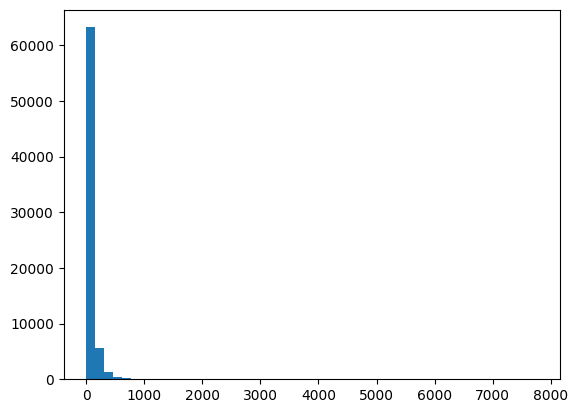

In [8]:
#cantidad de juegos por jugador
plt.hist(df_users['items'], bins=50)

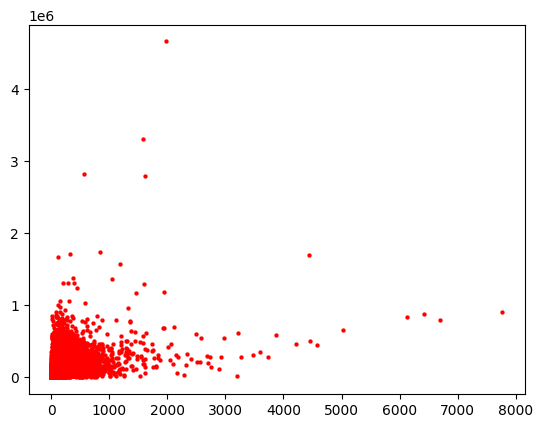

In [10]:
#tiempo jugado por juego
plt.scatter(df_users['items'], df_users['playtime_forever'], color='red', marker='.', linewidth=0.1)

In [64]:
df_users.columns

Index(['user_id', 'items', 'playtime_forever', 'playtime_2weeks',
       'total_spent', 'Action', 'Casual', 'Indie', 'Simulation', 'Strategy',
       'Free to Play', 'RPG', 'Sports', 'Adventure', 'Racing', 'Early Access',
       'Massively Multiplayer', 'Animation & Modeling', 'Video Production',
       'Utilities', 'Web Publishing', 'Education', 'Software Training',
       'Design & Illustration', 'Audio Production', 'Photo Editing',
       'Accounting', 'mean_recommend', 'mean_sentiment_analysis',
       'total_reviews'],
      dtype='object')

(array([1.1844e+04, 4.2170e+03, 2.2210e+03, 1.3390e+03, 8.5300e+02,
        6.8500e+02, 4.9600e+02, 3.9700e+02, 2.9600e+02, 2.5100e+02,
        0.0000e+00, 9.0000e+00, 0.0000e+00, 1.1000e+01, 1.0000e+00,
        5.0000e+00, 0.0000e+00, 4.0000e+00, 7.0000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20.]),
 <BarContainer object of 19 artists>)

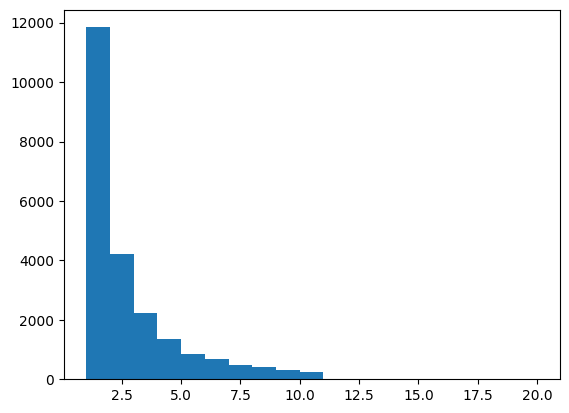

In [68]:
#reviews por jugador
plt.hist(df_users['total_reviews'], bins=19)

## User reviews

(array([   66.,   532.,  1215.,  6792., 22111., 28617.]),
 array([2010., 2011., 2012., 2013., 2014., 2015., 2016.]),
 <BarContainer object of 6 artists>)

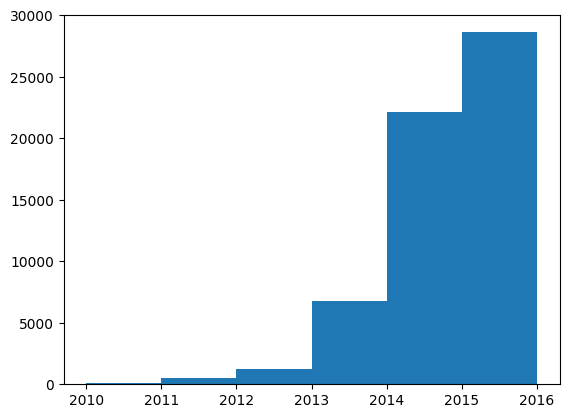

In [62]:
#reviews por año
plt.hist(df_user_reviews['year'], bins=df_user_reviews['year'].max()-df_user_reviews['year'].min())